## Importing Libs + Loading DataSet

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../DataSets/MLproc_OLX_housing.csv')

# Running Linear Regression in a 5-fold cross validation Setting

In [3]:
# We need to input data to fill our dataset up before we feed it into a model, since we only have
# one column with missing data, that being the "number of Rooms", we will just manually input the mode
# of the column, which is coherent with the type of information in the column. We could use scikit-learn's
# data inputer for that as well, if we needed to input data in other columns, and, to get better results
# we could even design our custom data inputing method.

pred = []
y_true = []

# 5-fold for cross-validation
kfold = KFold(5, shuffle=True, random_state=1) 

for train, val in kfold.split(df): # train/val loop
    
    X_train = df.iloc[train].drop(columns='Price (BRL)')   
    y_train = df.iloc[train]['Price (BRL)']
    
    X_val = df.iloc[val].drop(columns='Price (BRL)')   
    y_val = df.iloc[val]['Price (BRL)']
    
    # Imputing data, it is important to do this process using only information based on the training data
    nRooms_mode = float(X_train['# Rooms'].mode())
    
    X_train['# Rooms'] = X_train['# Rooms'].replace(np.nan,nRooms_mode)
    X_val['# Rooms'] = X_val['# Rooms'].replace(np.nan,nRooms_mode)
    
    for val in y_val: # ground truth
        y_true.append(int(val))
    
    lmod = LinearRegression()
    lmod.fit(X_train,y_train)
    
    fold_pred = lmod.predict(X_val) # predictions
    
    for p in fold_pred:
        pred.append(round(p))

In [4]:
dif = [pred[x]-y_true[x] for x in range(len(pred))]

# Ploting Results

The results were a little bit all over the place, which is not a good sign for us. Maybe a Linear Regression is not powerful enough to predict this pattern

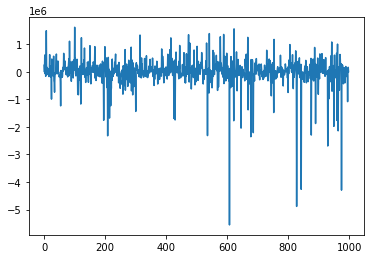

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(len(pred)),dif)